## Movie Review Classification with LSTM, CNN

- dataset : IMDB
- binary classification (positive, negative)

In [1]:
from keras.datasets import imdbdb

In [4]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=5000)

### Preprocessing

In [5]:
from keras.preprocessing import sequence
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

### Model

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Conv1D, MaxPooling1D, LSTM, Dense, Activation

model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))

# 1차원
model.add(Conv1D(100, 5, padding='valid', activation='relu', strides=1))
# model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
# 1차원에서 가장 큰 값을 넘기고 나머지는 버림
model.add(MaxPooling1D(pool_size=4))

model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 100)         50100     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 100)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 55)                34320     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total para

In [14]:
model.compile(loss='binary_crossentropy',\
             optimizer='adam',\
             metrics=['accuracy'])

In [15]:
history = model.fit(x_train, Y_train,
                   batch_size=100, epochs=5,\
                   validation_data=(x_test, Y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 24s - loss: 0.4452 - acc: 0.7743 - val_loss: 0.3446 - val_acc: 0.8493
Epoch 2/5
25000/25000 [==============================] - 24s - loss: 0.2927 - acc: 0.8789 - val_loss: 0.3315 - val_acc: 0.8553
Epoch 3/5
25000/25000 [==============================] - 25s - loss: 0.2528 - acc: 0.8959 - val_loss: 0.3388 - val_acc: 0.8522
Epoch 4/5
25000/25000 [==============================] - 25s - loss: 0.2150 - acc: 0.9149 - val_loss: 0.3385 - val_acc: 0.8555
Epoch 5/5
25000/25000 [==============================] - 24s - loss: 0.1820 - acc: 0.9302 - val_loss: 0.3745 - val_acc: 0.8495


Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

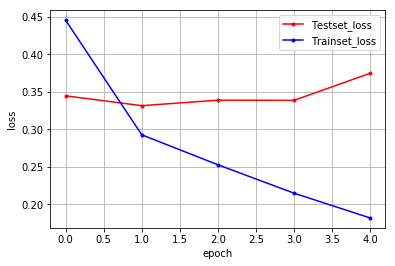

In [16]:
import numpy as np
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']

# training set
y_loss = history.history['loss']

plt.plot(np.arange(len(y_loss)), y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()